In [1]:
import os
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import pickle
import numpy as np

##Carga de los Datos
Se hace la carga de los datos desde la ruta Data y se separa el dataframe solo con los datos de vino blanco

In [2]:
mapeo_columnas = {
    'fixed acidity': 'fixed_acidity', 
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid', 
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}


In [3]:
df_wine_quality = pd.read_csv("../data/winequalityN.csv")
df_wine_quality = df_wine_quality.rename(columns=mapeo_columnas)
datos_white = df_wine_quality[df_wine_quality['type'] == 'white']
datos_white.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##Separar los datos en Test y Train

In [4]:
np.random.seed(101)
sample = np.random.choice(datos_white.index, size=int(0.8 * len(datos_white)), replace=False)
datos_white_train = datos_white.loc[sample]
datos_white_test = datos_white.drop(sample)
display(datos_white_train.head())
display(datos_white_test.head())

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4576,white,5.9,0.30,0.29,1.10,0.036,23.0,56.0,0.99040,3.19,0.38,11.3,5
167,white,6.7,0.46,0.18,2.40,0.034,25.0,98.0,0.98960,3.08,0.44,12.6,7
1889,white,7.6,0.15,0.40,1.30,0.036,24.0,112.0,0.99320,3.14,0.76,10.0,5
958,white,6.6,0.20,0.32,1.10,0.039,25.0,78.0,0.99260,3.39,0.54,10.2,7
3010,white,6.7,0.25,0.31,1.35,0.061,30.5,218.0,0.99388,3.16,0.53,9.5,5


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
11,white,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
13,white,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7
14,white,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,5
15,white,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7


# Prepocesar datos

Para nuestro caso de analisis vamos a aplicar una normalizacion

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [6]:
N_SAMPLES = 4898 
FEATURES = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']
TARGET = 'quality'

datos_white = pd.DataFrame({
    col: np.random.rand(N_SAMPLES) * np.random.randint(1, 10) for col in FEATURES
})
datos_white[TARGET] = np.random.randint(4, 9, N_SAMPLES)

X = datos_white[FEATURES]
y = datos_white[TARGET]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 * 0.80 = 0.20 (20% para Validation)


preprocessor_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor_pipeline.fit(X_train)

X_train_scaled = preprocessor_pipeline.transform(X_train)
X_val_scaled = preprocessor_pipeline.transform(X_val)
X_test_scaled = preprocessor_pipeline.transform(X_test)

# 4. Verificación y Persistencia (MLOps)
print(f"Media de 'alcohol' en X_train original: {X_train['alcohol'].mean():.4f}")
print(f"Media de 'alcohol' en X_train escalado: {X_train_scaled[:, X_train.columns.get_loc('alcohol')].mean():.4f}") # La media debe ser cercana a 0

# Guardar el Pipeline (¡Esto es clave para el MLOps!)
# Debes guardar el objeto preprocessor_pipeline para usarlo en producción
# cuando llegue un nuevo dato de vino.

OUTPUT_DIR = "./data/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

with open(os.path.join(OUTPUT_DIR, "preprocessor_pipeline.pkl"), "wb") as f:
    pickle.dump(preprocessor_pipeline, f)

print("-" * 50)
print(f"✅ Pipeline y datos escalados listos. El preprocesador se guardó en: {OUTPUT_DIR}")


Media de 'alcohol' en X_train original: 1.9965
Media de 'alcohol' en X_train escalado: -0.0000
--------------------------------------------------
✅ Pipeline y datos escalados listos. El preprocesador se guardó en: ./data/


Entrenar
Antes de ejecutar lo siguiente correr en la terminal en la misma carpeta donde esta el notebook:

matar procesos que este arriba sudo lsof -i :5000

mlflow server --backend-store-uri sqlite:///backend.db

Levantar en otra terminal mlflow ui

kill 12345 


In [7]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [8]:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://127.0.0.1:5000'


#Entrenar RandomForeste

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

experiment_name = "White_wine_experiment1_RFR"
mlflow.set_experiment(experiment_name)

with mlflow.start_run():
    rf = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mlflow.log_metric("rmse", rmse)

🏃 View run intrigued-zebra-662 at: http://127.0.0.1:5000/#/experiments/1/runs/d16816e3d6d549f8a058add3eb927fc7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


#Entrenar Xgboost

In [11]:
import xgboost as xgb

with mlflow.start_run():
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mlflow.log_metric("rmse", rmse)

🏃 View run traveling-skink-4 at: http://127.0.0.1:5000/#/experiments/1/runs/d4c4fe625e9b41a78a96dae95fe3dd08
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


#Entrenar un SVM

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


with mlflow.start_run(run_name="SVR_Baseline"): # Damos un nombre descriptivo a esta ejecución
    
    svr_reg = SVR(
        kernel='rbf', # Un kernel común para problemas de regresión no lineales
        C=1.0,        # Parámetro de penalización (rigidez de la restricción de error)
        gamma='scale' # Coeficiente de kernel (cuánto influye un único ejemplo de entrenamiento)
    )
    
    print("Iniciando entrenamiento SVR...")
    svr_reg.fit(X_train, y_train)
    print("Entrenamiento SVR finalizado.")
    
    y_pred = svr_reg.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    mlflow.log_param("kernel", 'rbf')
    mlflow.log_param("C", 1.0)
    mlflow.log_param("gamma", 'scale')
    
    mlflow.log_metric("rmse", rmse)
    
    mlflow.sklearn.log_model(svr_reg, "model_svr_baseline")
    
    print(f"SVR RMSE registrado en MLflow: {rmse:.4f}")

Iniciando entrenamiento SVR...
Entrenamiento SVR finalizado.


2025/10/03 16:31:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 16:31:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/03 16:31:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR RMSE registrado en MLflow: 1.4337
🏃 View run SVR_Baseline at: http://127.0.0.1:5000/#/experiments/1/runs/cc790f7c8d7d470b80e4662a72291588
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [13]:
import optuna

mlflow.set_experiment("White_wine_experiment1_RFR")

def objective(trial):
    with mlflow.start_run():
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
            'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 6, 1),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4, 1),
            'random_state': 42,
            'n_jobs': -1
        }
        mlflow.log_params(params)

        rf = RandomForestRegressor(**params)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mlflow.log_metric("rmse", rmse)

    return rmse

sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)

/Users/angeleduardogamarrarios/Desktop/UDEM/Aprendizaje en la nube/Repositorios/MLOps_CML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-03 16:31:59,791] A new study created in memory with name: no-name-0a4cb82f-af52-496f-944c-c302128fde8e
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n

🏃 View run unique-whale-622 at: http://127.0.0.1:5000/#/experiments/1/runs/8d89cd71a2024849a325aca4a52cc49f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run luminous-sow-397 at: http://127.0.0.1:5000/#/experiments/1/runs/da7b96bc42a946f0a25b3fa188af9a03
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run efficient-snail-496 at: http://127.0.0.1:5000/#/experiments/1/runs/0c88fced786f4e089d0ed4af07997da2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run powerful-ant-900 at: http://127.0.0.1:5000/#/experiments/1/runs/366f170e54bc46a1b4b1c45940d66952
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run defiant-koi-739 at: http://127.0.0.1:5000/#/experiments/1/runs/d1aae6e94ca148ac9497ab7fef6017d3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run illustrious-slug-7 at: http://127.0.0.1:5000/#/experiments/1/runs/e21146345f7f4b0f9344d0fa98070e3f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run abrasive-hound-374 at: http://127.0.0.1:5000/#/experiments/1/runs/00ae639142874a408759a5f366fe07ab
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run ambitious-grub-918 at: http://127.0.0.1:5000/#/experiments/1/runs/b80a39d4cbd1456b9453f5061561fd45
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run bemused-midge-118 at: http://127.0.0.1:5000/#/experiments/1/runs/ce7807d67e294169b3de397a70b7a58c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run mercurial-moose-478 at: http://127.0.0.1:5000/#/experiments/1/runs/45225ebf56ad454aa074c5ac82c09fde
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword

🏃 View run skittish-midge-576 at: http://127.0.0.1:5000/#/experiments/1/runs/3ccd2df5be564c279cb34f262c92c8aa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run mercurial-bear-901 at: http://127.0.0.1:5000/#/experiments/1/runs/934dfc548dbb47cb81d0c17901b4ebc9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run unequaled-perch-172 at: http://127.0.0.1:5000/#/experiments/1/runs/8d9e0cccf2be419d844b36c73558bee8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run respected-fly-128 at: http://127.0.0.1:5000/#/experiments/1/runs/c3fd764032294eebbfbcd7f89cd33c0d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run colorful-ant-163 at: http://127.0.0.1:5000/#/experiments/1/runs/ffadd9d6a0c34a3c8981fcb204942a35
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run industrious-bass-694 at: http://127.0.0.1:5000/#/experiments/1/runs/91bfbe62a19749daa5d72947744d3def
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run aged-goose-238 at: http://127.0.0.1:5000/#/experiments/1/runs/5ad2cd81487f470982a0bfefc45c39ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run gaudy-squirrel-994 at: http://127.0.0.1:5000/#/experiments/1/runs/457b6adb9748410393ff130bf9c5b8a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run loud-lamb-824 at: http://127.0.0.1:5000/#/experiments/1/runs/1d4e5f239d97493493c28ea3889f4c22
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run nimble-auk-967 at: http://127.0.0.1:5000/#/experiments/1/runs/51389102c6c34c84ad33d48359351e66
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:02,881] Trial 20 finished with value: 1.413651716448635 and parameters: {'n_estimators': 46, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 12 with value: 1.3950115241692393.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywo

🏃 View run rumbling-gnu-863 at: http://127.0.0.1:5000/#/experiments/1/runs/c73c25ce0d1648639351b61f4476f0de
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run vaunted-horse-390 at: http://127.0.0.1:5000/#/experiments/1/runs/c01a10bab22e4d0fabbfdfea8cc19b1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run magnificent-fawn-456 at: http://127.0.0.1:5000/#/experiments/1/runs/0b8ab01adc9c4339941b1c8038e9af89
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run thoughtful-dolphin-0 at: http://127.0.0.1:5000/#/experiments/1/runs/32ef85ec07b547c1aa8fff758f7ce65e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run rebellious-stag-331 at: http://127.0.0.1:5000/#/experiments/1/runs/899fd0d2496d4a23ad2521ede47da4c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run painted-loon-305 at: http://127.0.0.1:5000/#/experiments/1/runs/e26d48518c3a4d2cb35e642237476bd8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run vaunted-squid-743 at: http://127.0.0.1:5000/#/experiments/1/runs/10afd7dec1c4408cb134874a5de3df5e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run efficient-squid-14 at: http://127.0.0.1:5000/#/experiments/1/runs/a008de264f7c4200baa0591a883de43b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run powerful-moose-503 at: http://127.0.0.1:5000/#/experiments/1/runs/7bed7923fc6e4e9ea65630a1251958ad
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:04,004] Trial 29 finished with value: 1.415406637932416 and parameters: {'n_estimators': 42, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 12 with value: 1.3950115241692393.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywo

🏃 View run puzzled-grouse-991 at: http://127.0.0.1:5000/#/experiments/1/runs/afbb76dc946040d8b529d3d6a1ca5a61
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run popular-conch-72 at: http://127.0.0.1:5000/#/experiments/1/runs/a42a88e21d7c4c5fa3ae0d63e6c44e2c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run kindly-slug-896 at: http://127.0.0.1:5000/#/experiments/1/runs/d6a55702c6d540ef89d29b4fd74d25ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run awesome-eel-176 at: http://127.0.0.1:5000/#/experiments/1/runs/e51518890510427c94856aba193fc634
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:04,497] Trial 33 finished with value: 1.3995871321056588 and parameters: {'n_estimators': 36, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 12 with value: 1.3950115241692393.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywo

🏃 View run industrious-hawk-905 at: http://127.0.0.1:5000/#/experiments/1/runs/bf5892215a4c4a158060b6ba84c1a520
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run zealous-newt-508 at: http://127.0.0.1:5000/#/experiments/1/runs/07ec50638ee74203a69091474740e551
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run youthful-snail-292 at: http://127.0.0.1:5000/#/experiments/1/runs/76b0351b2d9e417f98aa87456b2043eb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run flawless-moose-836 at: http://127.0.0.1:5000/#/experiments/1/runs/00f6835fb6754f95ab75e440ff727e19
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run glamorous-mink-449 at: http://127.0.0.1:5000/#/experiments/1/runs/1b4e80f43cd84f0ea9c0e9bbf9883948
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run capricious-stoat-593 at: http://127.0.0.1:5000/#/experiments/1/runs/a3c88f243bdb469cbf8b6ebeea6def51
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run righteous-pig-399 at: http://127.0.0.1:5000/#/experiments/1/runs/0f562cb719174258b1b90152d8ae39fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:05,424] Trial 40 finished with value: 1.4072582517341021 and parameters: {'n_estimators': 50, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 37 with value: 1.3949545564160175.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywo

🏃 View run luxuriant-bug-356 at: http://127.0.0.1:5000/#/experiments/1/runs/e7e7789fa6a5419e8e71d2edec506cb8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run abrasive-carp-493 at: http://127.0.0.1:5000/#/experiments/1/runs/fa711f1d3f2047c985929cdfd672b5dc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run loud-crane-404 at: http://127.0.0.1:5000/#/experiments/1/runs/2790b0a023144d2ab9f1d271a78bdbb9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run wistful-snake-485 at: http://127.0.0.1:5000/#/experiments/1/runs/20b5cedf5cef4bd4ba5c09ef76f13729
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run indecisive-wren-276 at: http://127.0.0.1:5000/#/experiments/1/runs/8f92649af1f44093b877c61f2a51ffa5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run angry-asp-106 at: http://127.0.0.1:5000/#/experiments/1/runs/cb3a78c2acdc4710bec74d6b75a82f4a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run masked-koi-664 at: http://127.0.0.1:5000/#/experiments/1/runs/0d150a6a83a64fe1b6223576eacc7d3e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run adaptable-tern-978 at: http://127.0.0.1:5000/#/experiments/1/runs/5183eb200c5f4fe09a33f08ad85f142a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run bustling-ram-68 at: http://127.0.0.1:5000/#/experiments/1/runs/72bb1e0263ae480087c252c5a235e9fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run gentle-slug-106 at: http://127.0.0.1:5000/#/experiments/1/runs/b444831f9aea439cb48370f98cb92d8c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run clumsy-midge-698 at: http://127.0.0.1:5000/#/experiments/1/runs/8eefc3824af74f0d86fb6130b08ed7e3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run sassy-doe-911 at: http://127.0.0.1:5000/#/experiments/1/runs/f6a2176dcb364dc986b5c9c02a48a70f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run intelligent-colt-148 at: http://127.0.0.1:5000/#/experiments/1/runs/9783b6ea9b4b4814b60f208c3ccdff3f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run nervous-swan-326 at: http://127.0.0.1:5000/#/experiments/1/runs/2b7b8782bbb74ac690e3ec86cb396c28
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run rogue-vole-220 at: http://127.0.0.1:5000/#/experiments/1/runs/08b1cf7f3a7b4bcea025411127cf7949
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run awesome-calf-620 at: http://127.0.0.1:5000/#/experiments/1/runs/131424043e304f7e9695b258937280f6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run indecisive-swan-858 at: http://127.0.0.1:5000/#/experiments/1/runs/29929621ef164d1eb696e28ad46c31ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run spiffy-lynx-671 at: http://127.0.0.1:5000/#/experiments/1/runs/79ea3409eecd4625817d031c4ca4e65c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run sincere-wolf-473 at: http://127.0.0.1:5000/#/experiments/1/runs/11d9588ecf1a4f73a75d98db60820172
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run merciful-shrew-109 at: http://127.0.0.1:5000/#/experiments/1/runs/1d11848c72044e99b340e6fa88236647
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run caring-donkey-629 at: http://127.0.0.1:5000/#/experiments/1/runs/dc95d88181ce4ec6ac2de253522a28a5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run casual-newt-344 at: http://127.0.0.1:5000/#/experiments/1/runs/9774c8f76abd45c2af1d61798c67c571
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run worried-rook-30 at: http://127.0.0.1:5000/#/experiments/1/runs/ddfc1e55c9d143b0a5a3ef2185f8e200
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run righteous-rat-549 at: http://127.0.0.1:5000/#/experiments/1/runs/5df6ae34c42d40e88fd1e208610de367
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run mercurial-shrew-516 at: http://127.0.0.1:5000/#/experiments/1/runs/dbfe751f57ea464dad98e883f340e568
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run bittersweet-mare-623 at: http://127.0.0.1:5000/#/experiments/1/runs/d645e8a64e0741c696a3ff3999387a39
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:08,703] Trial 66 finished with value: 1.411377702798396 and parameters: {'n_estimators': 46, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 57 with value: 1.3947581290774211.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywo

🏃 View run rare-finch-105 at: http://127.0.0.1:5000/#/experiments/1/runs/cfb649dbae3f478588f768bec061a40c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run respected-donkey-124 at: http://127.0.0.1:5000/#/experiments/1/runs/f5582ae7b2e647b1baf09ee3f53a94f2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run bittersweet-conch-28 at: http://127.0.0.1:5000/#/experiments/1/runs/983bb22d67e84059a9958dbad82d211d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run persistent-eel-559 at: http://127.0.0.1:5000/#/experiments/1/runs/72383c5fd4a142ea9b820d966994bae2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run dashing-donkey-178 at: http://127.0.0.1:5000/#/experiments/1/runs/842d6e313b524e82b3fbb57c7d3606b2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run enthused-pig-921 at: http://127.0.0.1:5000/#/experiments/1/runs/9e1c2a1bca33430ea45e7c1115313cbf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run classy-sow-136 at: http://127.0.0.1:5000/#/experiments/1/runs/518e288595c142fe965e4f0bf630df4c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run gregarious-bear-502 at: http://127.0.0.1:5000/#/experiments/1/runs/ac865894bda74008a0a12ed83afd8c10
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run puzzled-dolphin-808 at: http://127.0.0.1:5000/#/experiments/1/runs/055f6b4e76054758ae12ac9c5323e34f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run trusting-bee-67 at: http://127.0.0.1:5000/#/experiments/1/runs/edcadb069b0e4a36b710b62f56b237be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run unequaled-shrike-205 at: http://127.0.0.1:5000/#/experiments/1/runs/0a0a3618307740bc8f3caeabac2c968f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run useful-croc-1000 at: http://127.0.0.1:5000/#/experiments/1/runs/c111c0836dfe4a3b8a96bddf8ca1adc7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run magnificent-fowl-550 at: http://127.0.0.1:5000/#/experiments/1/runs/99ab9ffbe6964cbbb12043aaaff18861
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run salty-shad-792 at: http://127.0.0.1:5000/#/experiments/1/runs/7e2ba82dc5044cc389fe054894dc4a22
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run upset-yak-77 at: http://127.0.0.1:5000/#/experiments/1/runs/c1e064bd9e034fa0b720585c14a2db3d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run salty-vole-201 at: http://127.0.0.1:5000/#/experiments/1/runs/38539cd2980f48ea94b33c880cb18756
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run dapper-quail-161 at: http://127.0.0.1:5000/#/experiments/1/runs/fbfb506cd83c465d942061c3c964d3e5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:10,593] Trial 83 finished with value: 1.394922429863758 and parameters: {'n_estimators': 49, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 72 with value: 1.3947146234560346.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywor

🏃 View run abundant-dove-328 at: http://127.0.0.1:5000/#/experiments/1/runs/97fb9114677545ad8709d01f2084a5fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run mysterious-dove-410 at: http://127.0.0.1:5000/#/experiments/1/runs/0da59d52f9ed4e54bdc2efca34262cc5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run suave-skink-353 at: http://127.0.0.1:5000/#/experiments/1/runs/2daee107f23f45738041d25be3851ca5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run unleashed-shad-928 at: http://127.0.0.1:5000/#/experiments/1/runs/ce26813f001e40e0a72bd424bb5514fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run unleashed-goat-997 at: http://127.0.0.1:5000/#/experiments/1/runs/3bcc02190fd7445e84a519338bb2ba64
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run invincible-ram-954 at: http://127.0.0.1:5000/#/experiments/1/runs/819eaca337db4a60b5b9c359fdf7cbfb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run delightful-steed-947 at: http://127.0.0.1:5000/#/experiments/1/runs/2721f5af5ecb46978e31b78201dedfb7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run rumbling-cow-663 at: http://127.0.0.1:5000/#/experiments/1/runs/a80e9329a87748a285d54f323f56f175
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


[I 2025-10-03 16:32:11,529] Trial 91 finished with value: 1.3947581290774211 and parameters: {'n_estimators': 50, 'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 72 with value: 1.3947146234560346.
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keywo

🏃 View run silent-worm-689 at: http://127.0.0.1:5000/#/experiments/1/runs/31f04adff0384b3d8d01fd432d2dc2cb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run popular-grouse-573 at: http://127.0.0.1:5000/#/experiments/1/runs/d92b9a652f324508b1d0fe8bc8c40021
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run bustling-mule-896 at: http://127.0.0.1:5000/#/experiments/1/runs/698dd47e68e14d2283a041efe33ac15d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run sassy-finch-245 at: http://127.0.0.1:5000/#/experiments/1/runs/1478d6fb96ca4af7921ceaa86254543d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run casual-cow-330 at: http://127.0.0.1:5000/#/experiments/1/runs/ee58388902f74ce89aac2987485bd07b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run lyrical-asp-814 at: http://127.0.0.1:5000/#/experiments/1/runs/fae5222209534e50b46458f846c5f177
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run bustling-seal-151 at: http://127.0.0.1:5000/#/experiments/1/runs/51a41e184dad4eaa85ad0b4034238f99
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run victorious-stag-183 at: http://127.0.0.1:5000/#/experiments/1/runs/b707834bdf2e4432a11a08a73a0173fe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:8: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/4159543332.py:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the k

🏃 View run luxuriant-duck-805 at: http://127.0.0.1:5000/#/experiments/1/runs/414a41a90cb14100b0f0ad2d6537a503
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [14]:
# Analyze the best trial
print(f"Best trial: {study.best_trial.number}")
print(f"Best value (RMSE): {study.best_value:.4f}")
print("Best params:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# Train the best model
best_params = study.best_params
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)
rmse_best = np.sqrt(mean_squared_error(y_val, y_pred_best))

print(f"\nBest model RMSE: {rmse_best:.4f}")

Best trial: 72
Best value (RMSE): 1.3947
Best params:
  n_estimators: 49
  max_depth: 1
  min_samples_split: 2
  min_samples_leaf: 4

Best model RMSE: 1.3951


/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/2665446357.py:6: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

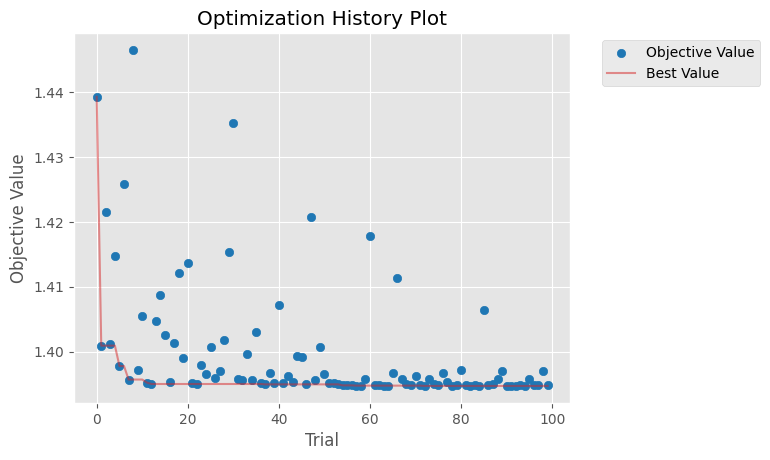

In [15]:
# Visualize optimization history
import matplotlib.pyplot as plt


# Optimization history
optuna.visualization.matplotlib.plot_optimization_history(study)

/var/folders/nt/4ldzwbz51gg979lps65n9sjr0000gn/T/ipykernel_16533/1036994904.py:1: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

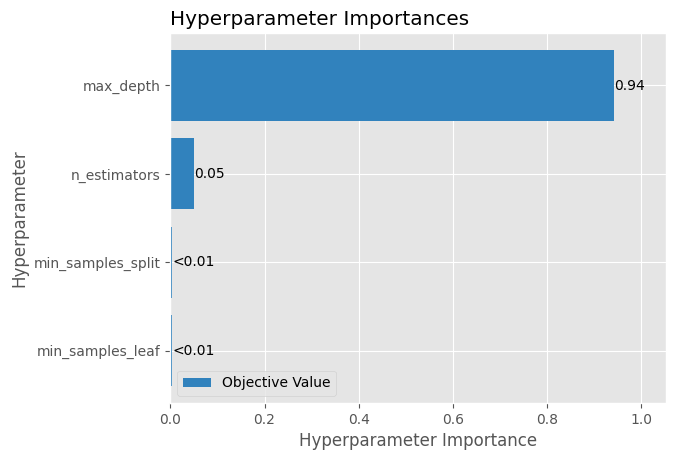

In [16]:
optuna.visualization.matplotlib.plot_param_importances(study)

In [19]:
# Register the best model
with mlflow.start_run(run_id=study.best_trial.user_attrs.get('mlflow_run_id')):
    # Log the model
    mlflow.sklearn.log_model(
        best_model, 
        "model",
        registered_model_name="White_wine_experiment1_RFR"
    )
    
    # Log preprocessing pipeline
    mlflow.sklearn.log_model(
        preprocessor_pipeline, 
        "preprocessor_pipeline",
        registered_model_name="White_wine_experiment1_RFR_preprocesor"
    )

2025/10/03 16:41:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 16:41:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/03 16:41:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'White_wine_experiment1_RFR' already exists. Creating a new version of this model...
2025/10/03 16:41:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: White_wine_experiment1_RFR, version 3
Created version '3' of model 'White_wine_experiment1_RFR'.
2025/10/03 16:41:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/03 16:41:27 WARNING mlflow.sklearn: Model was missing functio

🏃 View run loud-kit-787 at: http://127.0.0.1:5000/#/experiments/1/runs/8e04e0aded8649a484bc44499d52e377
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Created version '1' of model 'White_wine_experiment1_RFR_preprocesor'.
